## Understanding the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

In [3]:
# Reads the data as dataframe and shwos first 5 lines
data = pd.read_csv("../raw_data/Breast_Cancer.csv")
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [4]:
data.shape

(4024, 16)

In [5]:
# Shows some details of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

## Pre-processing

In [6]:
# Checks for missing values
data.isna().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

✅ The data set does not contain missing values.

In [7]:
# Checking for duplicates
data.duplicated().sum()

1

In [8]:
# Dropping duplicates
data.drop_duplicates(inplace=True)
data.shape

(4023, 16)

✅ Removed duplicates

In [9]:
data.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [10]:
# Fixing typo on T stage column name
data.rename(columns = {'T Stage ':'T Stage'}, inplace = True)

In [11]:
# Checking for number of different entrances for each column
data.nunique()

Age                        40
Race                        3
Marital Status              5
T Stage                     4
N Stage                     3
6th Stage                   5
differentiate               4
Grade                       4
A Stage                     2
Tumor Size                110
Estrogen Status             2
Progesterone Status         2
Regional Node Examined     54
Reginol Node Positive      38
Survival Months           107
Status                      2
dtype: int64

## Graphs

In [64]:
# Gives more details of the numeric columns
data.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Status_coded
count,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000
mean,53.969923,30.477007,14.358439,4.158837,71.301765,0.846880
std,8.963118,21.121253,8.100241,5.109724,22.923009,0.360147
min,30.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000,1.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000,1.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000,1.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000,1.000000


In [12]:
data['Race'].value_counts()


White    3412
Other     320
Black     291
Name: Race, dtype: int64

In [13]:
# Performed binary enconding for Status
mapp={'Dead':0,'Alive':1}
data['Status_coded']=data['Status'].map(mapp)
data['Status_coded']=data['Status_coded'].astype(int)
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Status_coded
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive,1
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive,1
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive,1
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive,1
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive,1


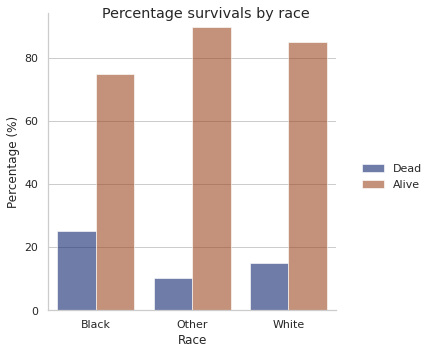

In [147]:
sns.set_theme(style="whitegrid")

race_counts = (data.groupby(['Race'])['Status_coded']
                     .value_counts(normalize=True)
                     .rename('Percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Race'))
r = sns.catplot(data=race_counts, x="Race", y="Percentage", hue="Status_coded", 
                kind="bar", palette="dark", alpha=.6, height=5)
r.fig.suptitle("Percentage survivals by race")
r.set_axis_labels("Race", "Percentage (%)")

# Replace title legend
new_title = ''
r._legend.set_title(new_title)

# Replace labels legend
new_labels = ['Dead', 'Alive']
for t, l in zip(r._legend.texts, new_labels):
    t.set_text(l)

📝 There is a higher chance of survivals for white people compared to black people.

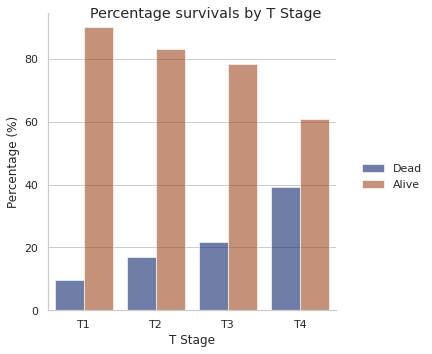

In [138]:
tstage_counts = (data.groupby(['T Stage'])['Status_coded']
                     .value_counts(normalize=True)
                     .rename('Percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('T Stage'))
r = sns.catplot(data=tstage_counts, x="T Stage", y="Percentage", hue="Status_coded", 
                kind="bar", palette="dark", alpha=.6, height=5)
r.fig.suptitle("Percentage survivals by T Stage")
r.set_axis_labels("T Stage", "Percentage (%)")

# Replace title legend
new_title = ''
r._legend.set_title(new_title)

# Replace labels legend
new_labels = ['Dead', 'Alive']
for t, l in zip(r._legend.texts, new_labels):
    t.set_text(l)

📝 Stage T1 is more deadly.

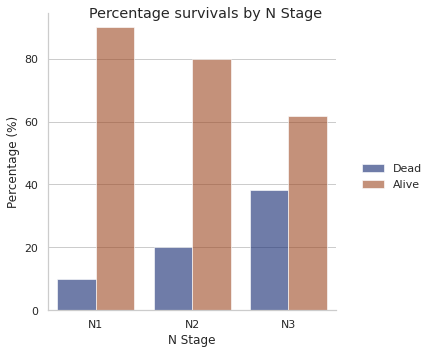

In [139]:
nstage_counts = (data.groupby(['N Stage'])['Status_coded']
                     .value_counts(normalize=True)
                     .rename('Percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('N Stage'))
r = sns.catplot(data=nstage_counts, x="N Stage", y="Percentage", hue="Status_coded", 
                kind="bar", palette="dark", alpha=.6, height=5)
r.fig.suptitle("Percentage survivals by N Stage")
r.set_axis_labels("N Stage", "Percentage (%)")

# Replace title legend
new_title = ''
r._legend.set_title(new_title)

# Replace labels legend
new_labels = ['Dead', 'Alive']
for t, l in zip(r._legend.texts, new_labels):
    t.set_text(l)

📝 The subcategory N1 is more the more severe on N stage category.

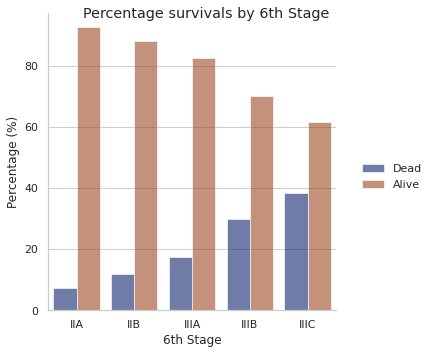

In [140]:
sixstage_counts = (data.groupby(['6th Stage'])['Status_coded']
                     .value_counts(normalize=True)
                     .rename('Percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('6th Stage'))
r = sns.catplot(data=sixstage_counts, x="6th Stage", y="Percentage", hue="Status_coded", 
                kind="bar", palette="dark", alpha=.6, height=5)
r.fig.suptitle("Percentage survivals by 6th Stage")
r.set_axis_labels("6th Stage", "Percentage (%)")

# Replace title legend
new_title = ''
r._legend.set_title(new_title)

# Replace labels legend
new_labels = ['Dead', 'Alive']
for t, l in zip(r._legend.texts, new_labels):
    t.set_text(l)

📝 The subcategory IIA is the more severe of the 6th stage category.

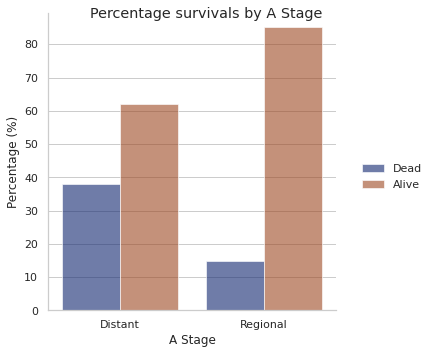

In [141]:
astage_counts = (data.groupby(['A Stage'])
               ['Status_coded']
                     .value_counts(normalize=True)
                     .rename('Percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('A Stage'))
r = sns.catplot(data=astage_counts, x="A Stage", y="Percentage", hue="Status_coded", 
                kind="bar", palette="dark", alpha=.6, height=5)
r.fig.suptitle("Percentage survivals by A Stage")
r.set_axis_labels("A Stage", "Percentage (%)")

# Replace title legend
new_title = ''
r._legend.set_title(new_title)

# Replace labels legend
new_labels = ['Dead', 'Alive']
for t, l in zip(r._legend.texts, new_labels):
    t.set_text(l)

📝 

In [143]:
# Separates Age by range
result = (data.groupby(pd.cut(data['Age'], bins=[1, 30, 40, 50, 60, 70]))
               ['Status_coded']
                     .value_counts()
                     .rename('Total')
                     .reset_index())


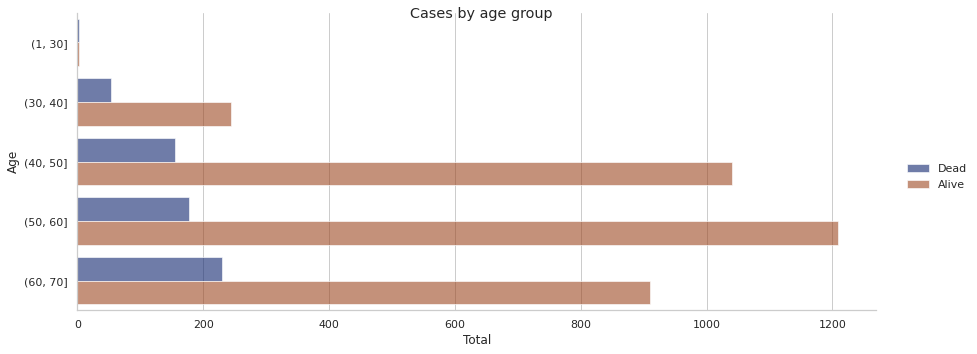

In [146]:
a = sns.catplot(data=result, x="Total", y="Age", hue="Status_coded", 
                kind="bar", palette="dark", alpha=.6, height=5, aspect=20/8)
a.fig.suptitle("Cases by age group")

# Replace title legend
new_title = ''
a._legend.set_title(new_title)

# Replace labels legend
new_labels = ['Dead', 'Alive']
for t, l in zip(a._legend.texts, new_labels):
    t.set_text(l)

📝 There is a higher incidence of breast cancer on the age group 50-60 years old.